In [1]:
import os
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np

from plot_settings import define_plot_settings

project_dir = os.path.abspath('..')
print(f"Project directory: {project_dir}")
sys.path.append(os.path.join(project_dir))

Project directory: /home/mtaho/Code/Courses/DeepLearning_PAINN


## Training history

Load training history data

In [2]:
relative_path = 'runs/train/20241119_0751'

data_path = f"{project_dir}/{relative_path}/data.pickle"

with open(data_path, 'rb') as f:
    data = pickle.load(f)

for key in data:
    data[key] = np.array(data[key])

FileNotFoundError: [Errno 2] No such file or directory: '/home/mtaho/Code/Courses/DeepLearning_PAINN/runs/train/20241119_0751/data.pickle'

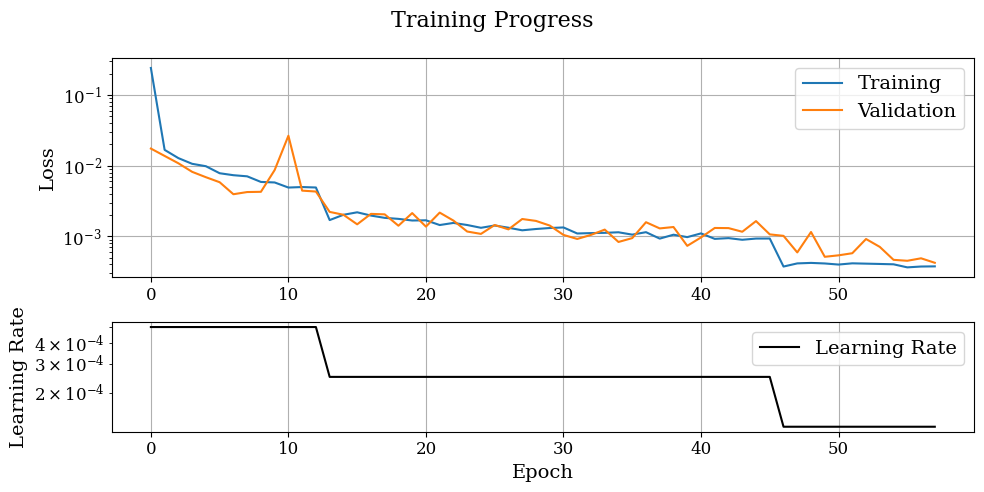

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5), height_ratios=[1, 0.5])

define_plot_settings(14)

lw = 1.5
# Plot primary y-axis (losses) on the first subplot
ax1.semilogy(data['epoch'], data['train_loss'],'-', lw=lw, label='Training')
ax1.semilogy(data['epoch'], data['val_loss'],'-', lw=lw, label='Validation')
# ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='upper right')  # Legend for the first y-axis
ax1.grid(True)

# Plot secondary y-axis (learning rate) on the second subplot
ax2.semilogy(data['epoch'], data['lr'], 'k-', label='Learning Rate')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Learning Rate', color='k')
ax2.tick_params(axis='y', labelcolor='k')
ax2.legend(loc='upper right')  # Combine legends
ax2.grid(True)

plt.suptitle('Training Progress')
fig.tight_layout()

## Trained model 

Load trained model

In [ ]:
from src.models import model_loader
checkpoint_path = f"{project_dir}/examples/model_checkpoint.pth"

painn, metadata = model_loader.load_checkpoint(checkpoint_path);

print(painn)


Checkpoint loaded from /work3/mtaho/PhD/DeepLearning/DeepLearning_PAINN/examples/model_checkpoint.pth
PaiNN(
  (embedding): Embedding(100, 128)
  (message_layers): ModuleList(
    (0-2): 3 x Message(
      (sj_linear): Sequential(
        (0): Linear(in_features=128, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=384, bias=True)
      )
      (rbf_linear): Linear(in_features=20, out_features=384, bias=True)
    )
  )
  (update_layers): ModuleList(
    (0-2): 3 x Update(
      (linear_nobias_U): Linear(in_features=128, out_features=128, bias=False)
      (linear_nobias_V): Linear(in_features=128, out_features=128, bias=False)
      (sj_linear): Sequential(
        (0): Linear(in_features=256, out_features=128, bias=True)
        (1): SiLU()
        (2): Linear(in_features=128, out_features=384, bias=True)
      )
    )
  )
  (final_reduction): Sequential(
    (0): Linear(in_features=128, out_features=64, bias=True)
    (1): SiLU()
    